In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# to divide train and test set
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from statsmodels.formula.api import ols
import statsmodels.api as sm



# feature scaling
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/Users/flatironschool/Documents/nyc-ds-010620/Projects/baseball_HR_linear_regression/Loading_Dataset/cleaned_data.csv', index_col=0)

In [3]:
df.shape

(854, 55)

In [4]:
X = df[['avg_hit_angle', 'avg_hit_speed', 'brl_pa', 'est_slg', 
                                                        'Age', 'AS__2', 'AS__3']]
Y = df.HR_per_PA

In [5]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
X_train, X_test, y_train, y_test = train_test_split(df[['avg_hit_angle', 'avg_hit_speed', 'brl_pa', 'est_slg', 
                                                        'Age', 'AS__2', 'AS__3']], Y,
                                                    test_size=0.2,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((683, 7), (171, 7))

In [6]:
#Scaling our X training and test sets

scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [7]:
#Create a list of alpha variables

alpha_list = np.linspace(0, 1 , 20)

alpha_list

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [8]:
#create a function that returns the alpha with the smallest sum mean squared

def best_alpha_variable(X_train_transformed, y_train, alpha_list):
    
    sum_mean_squared_min = 1000000000
    min_a = 0
    for a in alpha_list:
        ridge = Ridge(alpha=a)
        ridge.fit(X_train_transformed, y_train)

        # Generate preditions for training and test sets
        y_h_ridge_train = ridge.predict(X_train_transformed)
        y_h_ridge_test = ridge.predict(X_test_transformed)
        
        sum_mean_squared = np.sum((y_test - y_h_ridge_test)**2)
        
        if sum_mean_squared < sum_mean_squared_min:
            sum_mean_squared_min = sum_mean_squared
            min_a = a
    
        
    return min_a , sum_mean_squared_min


#         print('Train Error Ridge Model with alpha: {}'.format(a), np.sum((y_train - y_h_ridge_train)**2))
#         print('Test Error Ridge Model with alpha: {}'.format(a), np.sum((y_test - y_h_ridge_test)**2))
#         print('\n')
    

In [9]:
best_alpha_variable(X_train_transformed, y_train, alpha_list)

(0.0, 24.264409911814276)

In [10]:


#testing alphas on lasso

def best_alpha_variable(X_train_transformed, y_train, alpha_list):
    sum_mean_squared_min = 1000000000
    min_a = 0
    
    for a in alpha_list:
        lasso = Lasso(alpha=a)
        lasso.fit(X_train_transformed, y_train)

        # Generate preditions for training and test sets
        y_h_lasso_train = lasso.predict(X_train_transformed)
        y_h_lasso_test = lasso.predict(X_test_transformed)
        
        sum_mean_squared = np.sum((y_test - y_h_lasso_test)**2)
        
        if sum_mean_squared < sum_mean_squared_min:
            sum_mean_squared_min = sum_mean_squared
            min_a = a
    
        
    return min_a , sum_mean_squared_min


#         print('Train Error Lasso Model with alpha: {}'.format(a), np.sum((y_train - y_h_lasso_train)**2))
#         print('Test Error Lasso Model with alpha: {}'.format(a), np.sum((y_test - y_h_lasso_test)**2))
#         print('\n')
    
best_alpha_variable(X_train_transformed, y_train, alpha_list)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.63956253976896, tolerance: 0.022943288375084827
  positive)


(0.0, 24.264409911814283)

In [11]:
#An alpha of 0 resulted in the smallest mean squared errors, 
#so we decided to use a basic linear regression model as our final model

In [12]:
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

y_lin_predictions = lin.predict(X_test_transformed)

In [13]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_lin_predictions))/y_test.std())


0.6723894359839488


## Model Summary

In [14]:
lr_model = ols(formula='HR_per_PA~avg_hit_angle+avg_hit_speed+brl_pa+est_slg+Age+AS__2+AS__3', data=df).fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HR_per_PA   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          5.57e-128
Time:                        22:39:31   Log-Likelihood:                -431.67
No. Observations:                 854   AIC:                             879.3
Df Residuals:                     846   BIC:                             917.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.2801      0.752    -15.002      0.000     -12.756      -9.804
avg_hit_angle     0.0426      0.004     10.709      0.000       0.035       0.050
avg_hit_speed     0.0913      0.009     10.001      0.000       0.073       0.109
brl_pa            0.0882      0.014      6.161      0.000       0.060       0.116
est_slg          -1.3726      0.484     -2.839      0.005      -2.322      -0.424
Age              -0.0153      0.004     -4.039      0.000      -0.023      -0.008
AS__2            -0.1282      0.061     -2.113      0.035      -0.247      -0.009
AS__3            -0.2190      0.069     -3.176      0.002      -0.354      -0.084
==============================================================================
Omnibus:                      151.043   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.944
Skew:                          -0.941   Prob(JB):                     2.09e-80
Kurtosis:                       5.602   Cond. No.                     5.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
#test polynomial features

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X_train_transformed)

array([[-1.3342716 , -0.93939212, -1.20482422, ..., -0.25463001,
        -0.15913683,  0.87804276],
       [ 1.27942105, -0.36333444,  0.72971697, ..., -0.49396249,
         0.43372019, -0.62497279],
       [ 1.25649392,  1.48827954,  2.11753999, ..., -0.25463001,
         0.28999727, -1.60006966],
       ...,
       [ 0.22477314, -0.48677537, -0.57399557, ..., -0.57083418,
         0.65012116, -1.60006966],
       [ 0.91258699,  0.58304604,  1.78109805, ...,  0.37777834,
        -0.4302505 , -1.60006966],
       [-1.40305299,  1.2002507 , -0.23755363, ...,  0.18124041,
        -0.15913683, -0.62497279]])

In [18]:

poly_lr_model = linear_model.LinearRegression()
poly_lr_model.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
poly_predictions = poly_lr_model.predict(X_test_transformed)

In [20]:


print(np.sqrt(metrics.mean_squared_error(y_test, poly_predictions))/y_test.std())

0.6723894359839488


## Make Predictions for 2020

In [21]:
#import dataset from 2019 to predict home runs for 2020

df_20 = pd.read_csv('/Users/flatironschool/Documents/nyc-ds-010620/Projects/baseball_HR_linear_regression/Loading_Dataset/2020_prediction_dataset.csv', index_col=0)

In [22]:
df_20

,avg_hit_angle,anglesweetspotpercent,avg_hit_speed,fbld,avg_hr_distance,ev95percent,brl_pa,full_name,ba,est_ba,...,OPS,RBI/PA,SO/PA,SH/PA,SF/PA,IBB/PA,CHR_per_PA,angle_sweet_spot_index,AS__2,AS__3
0,15.3,42.4,86.4,90.6,392.0,28.9,3.3,Whit Merrifield,0.302,0.288,...,0.811,0.100680,0.171429,0.000000,0.005442,0.006803,0.021769,3,0,1
1,14.7,34.7,88.8,93.2,401.0,37.8,6.3,Marcus Semien,0.285,0.275,...,0.892,0.123159,0.136546,0.000000,0.001339,0.002677,0.044177,2,1,0
2,10.9,29.6,88.6,91.5,399.0,37.7,4.9,Starlin Castro,0.270,0.268,...,0.736,0.127219,0.164201,0.000000,0.013314,0.002959,0.032544,2,1,0
3,9.8,38.4,83.7,86.6,375.0,16.9,0.3,David Fletcher,0.290,0.302,...,0.734,0.075038,0.098009,0.001531,0.001531,0.003063,0.009188,3,0,1
4,15.6,36.8,88.8,91.4,394.0,33.5,5.0,Ozzie Albies,0.295,0.291,...,0.852,0.122507,0.159544,0.000000,0.005698,0.008547,0.034188,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.7,34.9,89.7,93.1,404.0,36.3,3.4,David Bote,0.257,0.251,...,0.785,0.115169,0.261236,0.000000,0.005618,0.011236,0.030899,2,1,0
246,10.1,36.4,88.2,91.2,398.0,38.0,2.2,Ben Gamel,0.248,0.235,...,0.710,0.092697,0.292135,0.000000,0.005618,0.005618,0.019663,3,0,1
247,16.0,38.0,91.4,95.1,402.0,50.0,8.3,Keston Hiura,0.303,0.266,...,0.938,0.140805,0.307471,0.000000,0.002874,0.002874,0.054598,3,0,1
248,20.4,32.0,85.8,92.0,403.0,32.5,4.9,Austin Hedges,0.176,0.198,...,0.563,0.103746,0.314121,0.005764,0.002882,0.008646,0.031700,2,1,0


In [23]:
#Create our predictor variables

X_predict = df_20[['avg_hit_angle', 'avg_hit_speed', 'brl_pa', 'est_slg', 
                                                        'Age', 'AS__2', 'AS__3']]



In [24]:
#scale predictors

scale = StandardScaler()
X_predict_transformed = scale.fit_transform(X_predict)

In [32]:
df_20.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed', 'fbld',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'full_name', 'ba', 'est_ba',
       'slg', 'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'PA▼', 'HR', 'OBP',
       'OPS', 'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA',
       'angle_sweet_spot_index', 'AS__2', 'AS__3', 'homer_predictions'],
      dtype='object')

In [33]:
#make predictions

Y_predictions = np.e**lin.predict(X_predict_transformed)

In [34]:
#reverse log transformation on predictions and multiply by number of plate appearances for each player

df_20['homer_predictions'] = Y_predictions*df_20['PA▼']

In [37]:
df_20

,avg_hit_angle,anglesweetspotpercent,avg_hit_speed,fbld,avg_hr_distance,ev95percent,brl_pa,full_name,ba,est_ba,...,RBI/PA,SO/PA,SH/PA,SF/PA,IBB/PA,CHR_per_PA,angle_sweet_spot_index,AS__2,AS__3,homer_predictions
0,15.3,42.4,86.4,90.6,392.0,28.9,3.3,Whit Merrifield,0.302,0.288,...,0.100680,0.171429,0.000000,0.005442,0.006803,0.021769,3,0,1,15.874233
1,14.7,34.7,88.8,93.2,401.0,37.8,6.3,Marcus Semien,0.285,0.275,...,0.123159,0.136546,0.000000,0.001339,0.002677,0.044177,2,1,0,26.289624
2,10.9,29.6,88.6,91.5,399.0,37.7,4.9,Starlin Castro,0.270,0.268,...,0.127219,0.164201,0.000000,0.013314,0.002959,0.032544,2,1,0,18.501254
3,9.8,38.4,83.7,86.6,375.0,16.9,0.3,David Fletcher,0.290,0.302,...,0.075038,0.098009,0.001531,0.001531,0.003063,0.009188,3,0,1,7.758810
4,15.6,36.8,88.8,91.4,394.0,33.5,5.0,Ozzie Albies,0.295,0.291,...,0.122507,0.159544,0.000000,0.005698,0.008547,0.034188,3,0,1,23.496650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.7,34.9,89.7,93.1,404.0,36.3,3.4,David Bote,0.257,0.251,...,0.115169,0.261236,0.000000,0.005618,0.011236,0.030899,2,1,0,9.085059
246,10.1,36.4,88.2,91.2,398.0,38.0,2.2,Ben Gamel,0.248,0.235,...,0.092697,0.292135,0.000000,0.005618,0.005618,0.019663,3,0,1,7.551492
247,16.0,38.0,91.4,95.1,402.0,50.0,8.3,Keston Hiura,0.303,0.266,...,0.140805,0.307471,0.000000,0.002874,0.002874,0.054598,3,0,1,18.859986
248,20.4,32.0,85.8,92.0,403.0,32.5,4.9,Austin Hedges,0.176,0.198,...,0.103746,0.314121,0.005764,0.002882,0.008646,0.031700,2,1,0,13.282082


In [28]:
df_20[df_20['full_name'] == " Bryce Harper"]['homer_predictions']

83    30.376446
Name: homer_predictions, dtype: float64

Text(0.5, 1.0, 'Histogram of Residuals.')

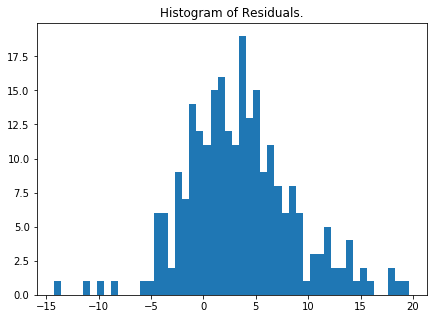

In [42]:

f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(df_20.HR - df_20.homer_predictions, bins=50)
ax.set_title("Histogram of Residuals.")


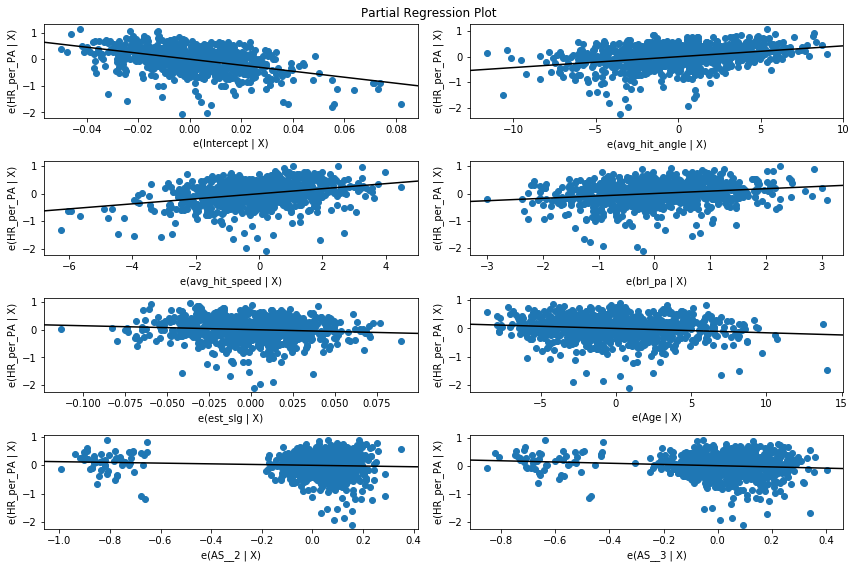

In [46]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lr_model, fig=fig)

Text(0.5, 1.0, 'Residuals')

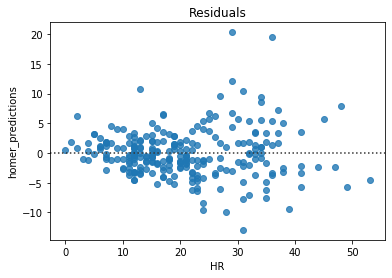

In [52]:
sns.residplot(df_20.HR, df_20.homer_predictions)
plt.title('Residuals')
